In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [5]:
X_class1= np.load("dataset/X_np_violence.npy").astype(np.float32)  #dim: (None, 58)
X_class0= np.load("dataset/X_np_nonviolence.npy").astype(np.float32) #dim: (None, 58)

#store all the data set into X_all
m1_all= X_class1.shape[0]
m0_all= X_class0.shape[0]
X_all= np.zeros(shape=( m1_all+ m0_all , 58), dtype=np.float32)
X_all[0:m1_all]= X_class1
X_all[m1_all:]= X_class0
meu_all= X_all.mean(axis=0)
std_all= X_all.std(axis=0)
X_all_norm= (X_all - meu_all)/std_all



## Examples for SVD operation due to Large memory requirement
# X_np_violence= X_class1[0:35000]
# X_np_nonviolence= X_class0[0:35000]
# m1= X_np_violence.shape[0]
# m0= X_np_nonviolence.shape[0]
# m= m1+m0
# X_large= np.zeros(shape=(m, 58), dtype=np.float32)
# X_large[0:m1]= X_np_violence
# X_large[m1:]= X_np_nonviolence
# meu= X_large.mean(axis=0)
# std= X_large.std(axis=0)
# X_large_norm= (X_large - meu)/std


print(X_all_norm.shape)

X_t= np.transpose(X_all_norm)

print(X_t.shape)

X_t*X_all_norm


(159875, 58)
(58, 159875)


### Cov mtx

(58, 58)


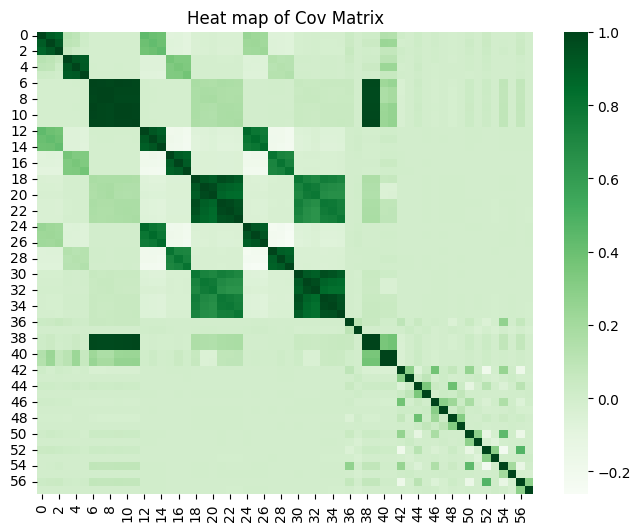

In [6]:
cov_mtx= np.matmul(np.transpose(X_all_norm), X_all_norm)/X_all_norm.shape[0]
cov_mtx.shape
u, s, v= np.linalg.svd(cov_mtx)

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(data= cov_mtx, ax=ax,cmap="Greens", cbar=True)
ax.set_title("Heat map of Cov Matrix")

print(cov_mtx.shape)


In [8]:
u, s, v= np.linalg.svd(cov_mtx)



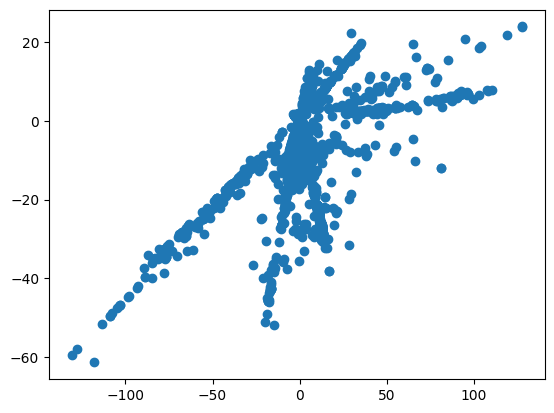

In [14]:
X_reduced= np.matmul(X_all_norm, u[:,0:2])



### X_all_norm: (m,58)
### u: (58,58)

#X_red= X_all_norm * u  : (m,58) * (58,2)===> (m,2)


plt.scatter(X_reduced[:,0], X_reduced[:,1])



(58, 58)

### Select Important Features

In [4]:
var_loss=(np.sum(s[0:33])/np.sum(s))
print("var retain: " + str(var_loss*100))

var retain: 98.80323579419506


In [17]:
# np.save("dataset/np_58features/u.npy", u)
# np.save("dataset/np_58features/s.npy", s)
# np.save("dataset/np_58features/v.npy", v)



# u= np.load("dataset/np_58features/u.npy")
# s= np.load("dataset/np_58features/s.npy")
# v= np.load("dataset/np_58features/v.npy")

Text(0.5, 1.0, 'Heat map of Var along PC')

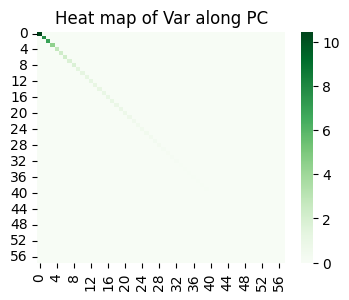

In [5]:
X_all_norm_pca= np.matmul(X_all_norm, u)
cov_mtx_pca= np.matmul(np.transpose(X_all_norm_pca), X_all_norm_pca)/X_all_norm_pca.shape[0]
fig, ax = plt.subplots(figsize=(4,3))
sns.heatmap(data= cov_mtx_pca, ax=ax, cmap="Greens", cbar=True)
ax.set_title("Heat map of Var along PC")

Text(0, 0.5, 'Principal component 54')

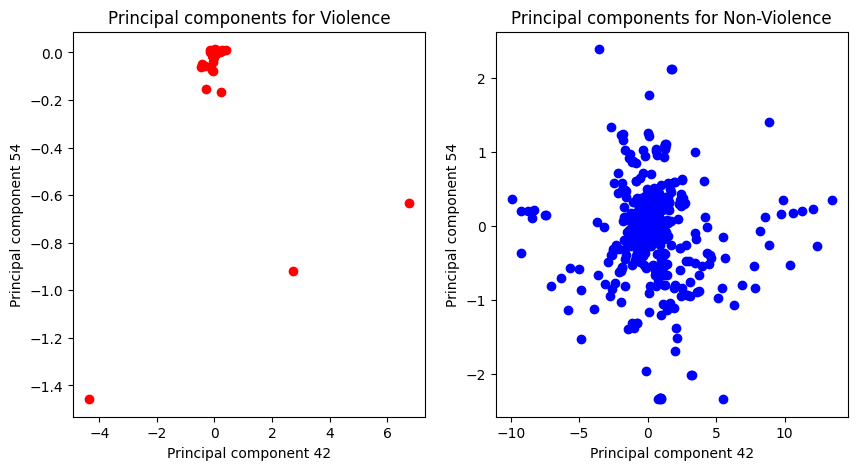

In [6]:
fig, ax= plt.subplots(nrows=1, ncols=2, figsize=(10,5))

c1= 42
c2= 54

ax[0].scatter(x=X_all_norm_pca[0:m1_all,c1],y=X_all_norm_pca[0:m1_all,c2], color='red')
ax[1].scatter(x=X_all_norm_pca[m1_all:,c1],y=X_all_norm_pca[m1_all:,c2], color='blue')

ax[0].set_title("Principal components for Violence")
ax[1].set_title("Principal components for Non-Violence")
ax[0].set_xlabel("Principal component "+str(c1));ax[0].set_ylabel("Principal component "+str(c2))
ax[1].set_xlabel("Principal component "+str(c1));ax[1].set_ylabel("Principal component "+str(c2))

In [ ]:
f,axes= plt.subplots(nrows=8, ncols=8, figsize=(50,50))

tot= 58
c1=0
c2=1

count=0
for i in range(8):
    for j in range(8):
        axes[i,j].scatter(x=X_all_norm_pca[0:m1_all,c1],y=X_all_norm_pca[0:m1_all,c2], color='red')
        axes[i,j].scatter(x=X_all_norm_pca[m1_all:,c1],y=X_all_norm_pca[m1_all:,c2], color='blue', alpha=0.10)
        axes[i,j].legend(["violence", "non-violence"])
        axes[i,j].set_xlabel("c" + str(c1))
        axes[i,j].set_ylabel("c" + str(c2))
        count+=1
        c1+=1
        c2+=1
        if c2==58:
            break
    if c2==58:
        break

plt.show()

# plt.scatter(x=X_large_pca_norm[0:m1,c1],y=X_large_pca_norm[0:m1,c2], color='red')
# plt.scatter(x=X_large_pca_norm[m1:,c1],y=X_large_pca_norm[m1:,c2], color='blue')
# plt.legend(["violence", "non-violence"])

# plt.xlabel("Principal component "+str(c1))
# plt.ylabel("Principal component "+str(c2))
# plt.title("Principal components for violence and non-violence")
# plt.show()

### Train a model on Principal Features

In [7]:
X_all_norm_pca= np.matmul(X_all_norm, u)
X_all_norm_pca.shape

(159875, 58)

In [8]:
y_label= np.zeros(shape=(X_all_norm_pca.shape[0], ))
y_label[0:m1_all]= 1
y_label[m1_all:]= 0

X_train, X_test, y_train, y_test= train_test_split(X_all_norm_pca, y_label, test_size=0.30, shuffle=True, random_state=13)

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(111912, 58)
(111912,)
(47963, 58)
(47963,)


In [56]:
inputs= tf.keras.layers.Input(shape=(58,))
x= tf.keras.layers.Dense(units= 32, activation='tanh')(inputs)
x= tf.keras.layers.Dense(units= 32, activation='tanh')(x)
x= tf.keras.layers.Dense(units= 16, activation='tanh')(x)
x= tf.keras.layers.Dense(units= 8, activation='tanh')(x)
x= tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
cls_pca= tf.keras.Model(inputs=inputs, outputs=x)
cls_pca.compile(optimizer='adam', loss='Hinge', metrics=['Accuracy', 'Precision', 'Recall'])
cls_pca.summary()


Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 58)]              0         
                                                                 
 dense_69 (Dense)            (None, 32)                1888      
                                                                 
 dense_70 (Dense)            (None, 32)                1056      
                                                                 
 dense_71 (Dense)            (None, 16)                528       
                                                                 
 dense_72 (Dense)            (None, 8)                 136       
                                                                 
 dense_73 (Dense)            (None, 1)                 9         
                                                                 
Total params: 3,617
Trainable params: 3,617
Non-trainable p

In [ ]:
cls_pca_hist=  cls_pca.fit(x=X_train, y=y_train, validation_data=(X_test,y_test), batch_size=X_train.shape[0], epochs=2000)

Text(0.5, 1.0, 'recall')

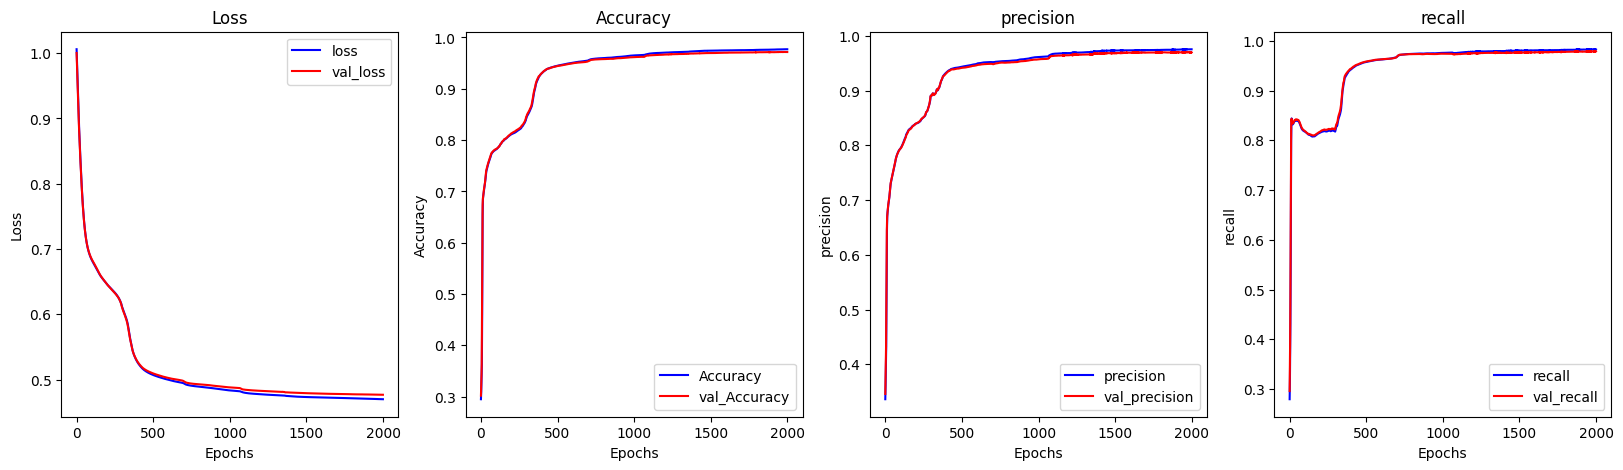

In [58]:
fig, ax= plt.subplots(nrows=1, ncols=4, figsize=(20,5))
#Loss fig
ax[0].plot(cls_pca_hist.history['loss'], color='blue')
ax[0].plot(cls_pca_hist.history['val_loss'], color='red')
ax[0].legend(["loss", "val_loss"])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss")

#Accuracy fig
ax[1].plot(cls_pca_hist.history['Accuracy'], color='blue')
ax[1].plot(cls_pca_hist.history['val_Accuracy'], color='red')
ax[1].legend(["Accuracy", "val_Accuracy"])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")

#Precision
ax[2].plot(cls_pca_hist.history['precision'], color='blue')
ax[2].plot(cls_pca_hist.history['val_precision'], color='red')
ax[2].legend(["precision", "val_precision"])
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("precision")
ax[2].set_title("precision")


#Recall
ax[3].plot(cls_pca_hist.history['recall'], color='blue')
ax[3].plot(cls_pca_hist.history['val_recall'], color='red')
ax[3].legend(["recall", "val_recall"])
ax[3].set_xlabel("Epochs")
ax[3].set_ylabel("recall")
ax[3].set_title("recall")

In [59]:
np.save("dataset/loss58c_58_32_32_16_8_1.npy",cls_pca_hist.history)

In [60]:
temp= np.load("dataset/loss58c_58_32_32_16_8_1.npy", allow_pickle='TRUE').item()

In [62]:
np.asarray(temp['Accuracy']).max()

0.9770087003707886

### Decision Tree classifier

In [9]:
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [8]:
cls_tree= tree.DecisionTreeClassifier(criterion='entropy', random_state= 19)
cls_tree.fit(X_train[:, 0:33], y_train)

DecisionTreeClassifier(criterion='entropy', random_state=19)

In [9]:
cls_tree.score(X_test[:, 0:33], y_test)

0.9555907678835769

In [10]:
cls_tree.predict(X_test[0:3,0:33])

array([1., 1., 1.])

In [150]:
##split the class 0 and class 1
y0= y_test[y_test==0]
y1= y_test[y_test==1]
X0=  X_test[y_test==0][:,0:33]
X1=  X_test[y_test==1][:,0:33]

tree_1= cls_tree.score(X1, y1)
tree_0= cls_tree.score(X0, y0)


TP= tree_1
FP= 1 - tree_0
FN= 1- tree_1

precision= TP/(TP+FP)
recall= TP/(TP+FN)

print(tree_1)
print(tree_0)
print(precision)
print(recall)

0.9606325960594851
0.9493688574223299
0.9499328012631958
0.9606325960594851


### Random Forest Classifier

In [10]:
rnd_forest= RandomForestClassifier(criterion='gini')
rnd_forest.fit(X_train[:, 0:33], y_train)

RandomForestClassifier()

In [14]:
#rnd_forest.score(X_test[:, 0:33], y_test)

print(np.argmax(rnd_forest.feature_importances_))

print((rnd_forest.feature_importances_))


6
[0.05403152 0.05251749 0.02676586 0.04328977 0.07936916 0.07280468
 0.08798358 0.03137163 0.0396379  0.0360119  0.03622036 0.01876144
 0.01701797 0.00929443 0.01180566 0.00698804 0.02107647 0.03008793
 0.04349222 0.01286791 0.0224027  0.02386983 0.01348026 0.01625694
 0.01382202 0.02398592 0.03250193 0.02519164 0.01564259 0.01691453
 0.01917297 0.02024869 0.02511404]


In [158]:
##split the class 0 and class 1
y0= y_test[y_test==0]
y1= y_test[y_test==1]
X0=  X_test[y_test==0][:,0:33]
X1=  X_test[y_test==1][:,0:33]

rnd_forest_1= rnd_forest.score(X1, y1)
rnd_forest_0= rnd_forest.score(X0, y0)


TP= rnd_forest_1
FP= 1 - rnd_forest_0
FN= 1- rnd_forest_1

precision= TP/(TP+FP)
recall= TP/(TP+FN)

print(rnd_forest_1)
print(rnd_forest_0)
print(precision)
print(recall)

0.98875217030271
0.9735432484046765
0.9739395990079954
0.98875217030271


### KNN

In [155]:
knn= KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train[:, 0:33], y_train)

KNeighborsClassifier(n_neighbors=3)

In [156]:
knn.score(X_test[:, 0:33], y_test)

0.9858015553655943

In [157]:
##split the class 0 and class 1
y0= y_test[y_test==0]
y1= y_test[y_test==1]
X0=  X_test[y_test==0][:,0:33]
X1=  X_test[y_test==1][:,0:33]

knn_1= knn.score(X1, y1)
knn_0= knn.score(X0, y0)


TP= knn_1
FP= 1 - knn_0
FN= 1- knn_1

precision= TP/(TP+FP)
recall= TP/(TP+FN)

print(knn_1)
print(knn_0)
print(precision)
print(recall)

0.9881105155884351
0.9829521635847035
0.9830396510347722
0.9881105155884351


### DNN

In [123]:
inputs= tf.keras.layers.Input(shape=(33,))
x= tf.keras.layers.Dense(units=25, activation='tanh')(inputs)
x= tf.keras.layers.Dense(units=25, activation='tanh')(x)
x= tf.keras.layers.Dense(units=20, activation='tanh')(x)
x= tf.keras.layers.Dense(units=20, activation='tanh')(x)
x= tf.keras.layers.Dense(units=1, activation='sigmoid')(x)
dnn= tf.keras.Model(inputs=inputs, outputs=x)
dnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.hinge,metrics=['Accuracy', 'Precision', 'Recall'])
dnn.summary()


Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 33)]              0         
                                                                 
 dense_27 (Dense)            (None, 25)                850       
                                                                 
 dense_28 (Dense)            (None, 25)                650       
                                                                 
 dense_29 (Dense)            (None, 20)                520       
                                                                 
 dense_30 (Dense)            (None, 20)                420       
                                                                 
 dense_31 (Dense)            (None, 1)                 21        
                                                                 
Total params: 2,461
Trainable params: 2,461
Non-trainable p

In [124]:
dnn_hist= dnn.fit(x=X_train[:,0:33], y=y_train, validation_data=(X_test[:, 0:33],y_test), batch_size=X_train.shape[0], epochs=500)

Epoch 1/500
1/1 [==============================] - 1s 942ms/step - loss: 0.9868 - Accuracy: 0.3311 - precision: 0.3643 - recall: 0.2777 - val_loss: 0.9199 - val_Accuracy: 0.6351 - val_precision: 0.6529 - val_recall: 0.7247
Epoch 2/500
1/1 [==============================] - 0s 131ms/step - loss: 0.9174 - Accuracy: 0.6398 - precision: 0.6581 - recall: 0.7284 - val_loss: 0.8637 - val_Accuracy: 0.7204 - val_precision: 0.7052 - val_recall: 0.8486
Epoch 3/500
1/1 [==============================] - 0s 98ms/step - loss: 0.8613 - Accuracy: 0.7200 - precision: 0.7060 - recall: 0.8479 - val_loss: 0.8178 - val_Accuracy: 0.7263 - val_precision: 0.7110 - val_recall: 0.8501
Epoch 4/500
1/1 [==============================] - 0s 65ms/step - loss: 0.8156 - Accuracy: 0.7284 - precision: 0.7136 - recall: 0.8516 - val_loss: 0.7799 - val_Accuracy: 0.7326 - val_precision: 0.7163 - val_recall: 0.8543
Epoch 5/500
1/1 [==============================] - 0s 68ms/step - loss: 0.7778 - Accuracy: 0.7343 - precision:

Text(0.5, 1.0, 'recall')

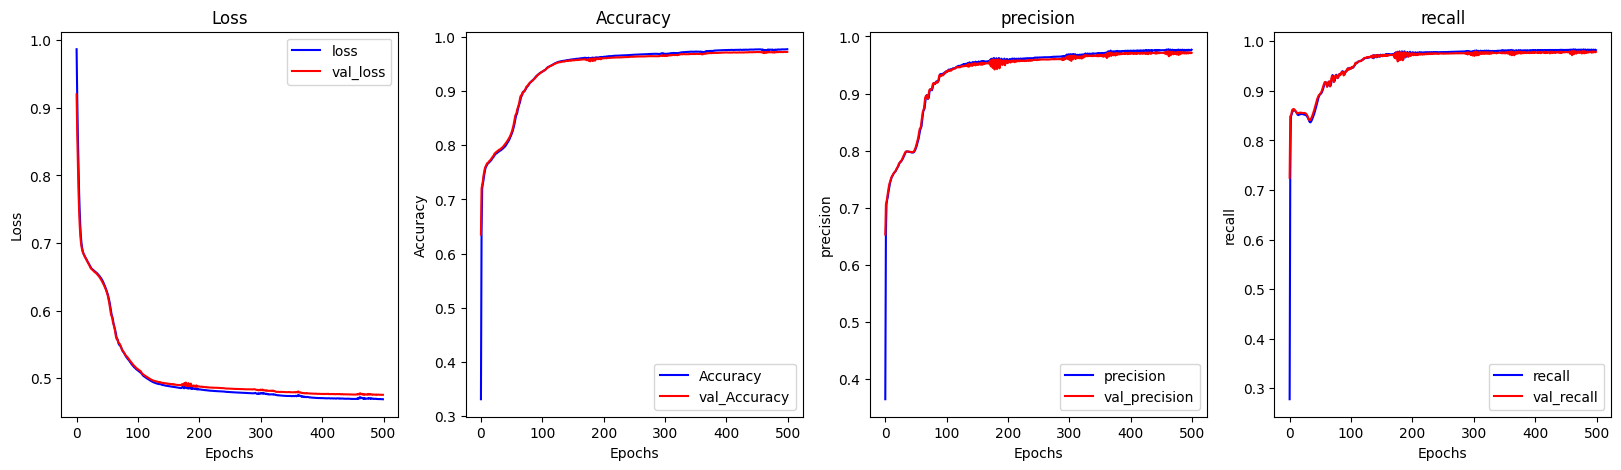

In [125]:
cls_pca_hist= dnn_hist
fig, ax= plt.subplots(nrows=1, ncols=4, figsize=(20,5))
#Loss fig
ax[0].plot(cls_pca_hist.history['loss'], color='blue')
ax[0].plot(cls_pca_hist.history['val_loss'], color='red')
ax[0].legend(["loss", "val_loss"])
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Loss")
ax[0].set_title("Loss")

#Accuracy fig
ax[1].plot(cls_pca_hist.history['Accuracy'], color='blue')
ax[1].plot(cls_pca_hist.history['val_Accuracy'], color='red')
ax[1].legend(["Accuracy", "val_Accuracy"])
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Accuracy")
ax[1].set_title("Accuracy")

#Precision
ax[2].plot(cls_pca_hist.history['precision'], color='blue')
ax[2].plot(cls_pca_hist.history['val_precision'], color='red')
ax[2].legend(["precision", "val_precision"])
ax[2].set_xlabel("Epochs")
ax[2].set_ylabel("precision")
ax[2].set_title("precision")


#Recall
ax[3].plot(cls_pca_hist.history['recall'], color='blue')
ax[3].plot(cls_pca_hist.history['val_recall'], color='red')
ax[3].legend(["recall", "val_recall"])
ax[3].set_xlabel("Epochs")
ax[3].set_ylabel("recall")
ax[3].set_title("recall")

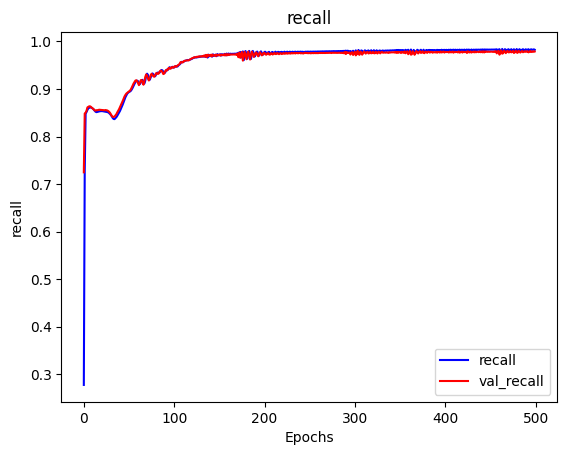

In [130]:
#Loss fig
plt.plot(cls_pca_hist.history['recall'], color='blue')
plt.plot(cls_pca_hist.history['val_recall'], color='red')
plt.legend(["recall", "val_recall"])
plt.xlabel("Epochs")
plt.ylabel("recall")
plt.title("recall")
plt.show()


In [120]:
X_class0.shape

(71364, 58)

In [121]:
X_class1.shape

(88511, 58)

In [122]:
71364/159875*100

44.637372947615326

88511